# Introduction to the Mandelbrot Set

Before thinking about what different parts of the **Mandelbrot set** may mean, what exactly *is* the Mandelbrot set? The most concise definition is that which Wikipedia gives:

> "The Mandelbrot set is a two-dimensional set that is defined in the complex plane as the complex numbers $c$ for which the function $f_c(z) = z^2+ c$ does not diverge to infinity when iterated starting at $z=0$" 

But what does this exactly mean?

This means that if you take a complex number $c$ of the form $a+bi$ and let $z_0=0$, and define $z_{n+1}=z_{n}^2+c$ and repeatedly iterate through this iterative formula, you have two possible options - it "blows up" to infinity, or it remains stable. Here is an example (where $c$ is a real number) when $c=-1$

$$
\begin{aligned}
z_1&=0^2-1&&=-1 \\
z_2&=-1^2-1 &&= 0\\
z_3 &&&=-1
\end{aligned}
$$

Here you see that when $c=-1$, then the sequence bounces between -1 and 0. **It is stable, and hence in the Mandelbrot set.**

Let's look at a second example, when $c=1$

$$
\begin{aligned}
z_1 &= 0^2+1 &&= 1 \\
z_2 &= 1^2+1 &&= 2 \\
z_3 &= 2^2+1 &&= 5 \\
z_4 &= 5^2+1 &&= 26 \\
\end{aligned}
$$

Therefore, we see that using $c=1$ quickly produces larger numbers till infinity, and can conclude that $c=1$ **is outside the Mandelbrot set**

Let's take a look at a 3rd example where $c$ is a complex number such as $c=1+i$

$$
\begin{aligned}
z_1 &= 0^2+1+i &&=1+i \\
z_2 &=(1+i)^2 +1+i &&=1+3i \\
z_3 &= (1+3i)^2 + 1+i&&=-7+7i \\
z_4 &= (-7+7i)^2 + 1+i &&= 1-97i \\
\end{aligned}
$$

Looking at the magnitudes of the complex numbers, we see that they diverge to infinity again, concluding that $c=1+i$ **is again outside the Mandelbrot set.**

We can prove that for any value of $c$, if at any point in its iterative sequence, $|z_n| \gt 2$, then it will escape to infinity, and thus, the mandelbrot set is bounded by $|c| \lt 2$. Look at the dropdown below for the proof.

<details>
<summary>Proof</summary>

::: {#thm-mandelbrot-bound}
## Mandelbrot set escape radius
Let $c \in \mathbb{C}$, and define the sequence $z_n$ by

$$
\begin{aligned}
z_0 &= 0 \\
z_{n+1} &= z_n^2 + c \\
\end{aligned}
$$
If at any point in its iterative sequence, $|z_n| \gt 2$, then it will escape to infinity.
:::

::: {.proof}
If $|z_{n+1}|=|z_n^2+c|$
then by the reverse triangle inequality,
$$
|z+w| \ge \bigl| |z|-|w| \bigr| \\
$$
it follows
$$
|z_n^2+c| \ge \bigl| |z_n^2|-|c| \bigr| \\
$$
if $|z_n| \ge |c|$ we can deduce
$$
\begin{aligned}
\bigl| |z_n^2|-|c| \bigr| &\ge \bigl| |z_n^2|-|z_n| \bigr| \\
\bigl| |z_n^2|-|c| \bigr| &\ge \bigl| |z_n|(|z_n|-1) \bigr| \\
\end{aligned}
$$
If $|z_n| \gt 2$ then $|z_n|-1 \gt 1$.
Let $\alpha=1+\beta$ so that we can substitute it into the equation.
$$
\begin{aligned}
z_{n+1} \ge \bigl| |z_n|\alpha \bigr| \text{where } \alpha \gt 1 \\
\text{hence, if } |z_n| > 2 \text{ then } z_{n+1} > z_n \\
\text{By induction, it will escape to infinity}
\qed
\end{aligned}
$$

:::

</details>

For what this would look like on the complex plane, where points in the Mandelbrot set are in black, and points outside the Mandelbrot set are in white, see @fig-mandelbrot-basic

/tmp/ipykernel_5449/2901218406.py:15: RuntimeWarning: overflow encountered in multiply
  Z = Z*Z + C
/tmp/ipykernel_5449/2901218406.py:15: RuntimeWarning: invalid value encountered in multiply
  Z = Z*Z + C


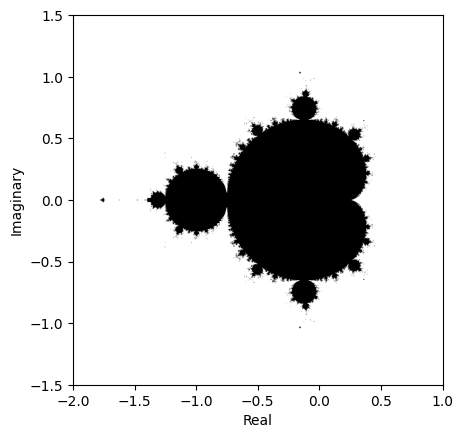

In [5]:
#| label: fig-mandelbrot-basic
#| fig-cap: "Mandelbrot set on the complex plane"
#| warning: false
import numpy as np
import matplotlib.pyplot as plt

def complex_matrix(xmin, xmax, ymin, ymax, pixel_per_unit_width, pixels_per_unit_height):
    re = np.linspace(xmin, xmax, int((xmax-xmin)*pixel_per_unit_width))
    im = np.linspace(ymin, ymax, int((ymax-ymin)*pixels_per_unit_height))
    return re[np.newaxis, :] + 1j * im[:, np.newaxis]
def mandelbrot(C, max_iter):
  Z = np.zeros(C.shape, dtype=complex)
  mask = np.ones(C.shape, dtype=bool)
  for i in range(max_iter):
      Z = Z*Z + C
      mask &= np.abs(Z) <= 2

  return mask

C = complex_matrix(-2, 1, -1.5, 1.5, 300, 300)
mandelbrot_set = mandelbrot(C, 50)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.imshow(mandelbrot_set, extent=[-2,1,-1.5,1.5], cmap='binary')


Here we see the most famous fractal in mathematics - the Mandelbrot set, which we found by a simple mathematical rule. The axes on @fig-mandelbrot-basic denote the real and imaginary parts of the complex number $c=a+bi$ where $a$ is the real value on the x axis and $b$ is the imaginary value on the y axis .

# The Bulbs
## The Bifurcation of the Quadratic Map


**What is a bifurcation diagram of the Quadratic Map?**

It shows how the long term behaviour of a system changes as a parameter is adjusted in the quadratic map.

The Bifurcation diagram of the Quadratic Map and the Mandelbrot set are linked and correspond to each other and the Quadratic Map is defined as: $$x_{n+1}=x_n^2+c$$

Let's take an example value for $c$ like $c=0.2$ and look at its long term behaviour.

$$
\begin{aligned}
x_0&=0 \\
x_1&=0^2+0.2 &&=0.2 \\
x_2&=0.2^2+0.2 &&=0.24 \\
x_3&=0.24^2+0.2 &&=0.2576 \\
x_4&=0.2576^2+0.2 &&=0.2664 \\
x_5&=0.2664^2+0.2 &&=0.2710 \\
\end{aligned}
$$

Here, we see the values converging to a single fixed point at approximately 0.2764 which is called a fixed point. Taking a different value for $c$ like $c=0.5$ we see a different behaviour: 
$$
\begin{aligned}
x_0&=0 \\
x_1&=0^2+0.5 &&=0.5 \\
x_2&=0.5^2+0.5 &&=0.75 \\
x_3&=0.75^2+0.5 &&=1.0625 \\
x_4&=1.0625^2+0.5 &&=1.6289 \\
x_5&=1.6289^2+0.5 &&=3.1555 \\
\end{aligned}
$$

Here, we see the values diverging to infinity, indicating that for $c=0.5$, the system does not settle into a fixed point.

We can also do this for negative numbers like $c=-1$: 
$$
\begin{aligned}
x_0&=0 \\
x_1&=0^2-1 &&=-1 \\
x_2&=-1^2-1 &&=0 \\
x_3&=0^2-1 &&=-1 \\
\end{aligned}
$$

We can clearly see that the values cycle between -1 and 0, showcasing the behaviour of a period-2 cycle.

## Bifurcation Diagram

The values of $c$ that do not escape to infinity are exactly between -2 and 0.25. For the proof of this, please look at the dropdown underneath. 
<details>
<summary>Proof</summary>

::: {#thm-real-quadratic-map-bound}
## Bounds of Real Quadratic Map
Let $c \in \mathbb{R}$, and define the sequence $x_n$ by

$$
\begin{aligned}
x_0 &= 0 \\
x_{n+1} &= x_n^2 + c \\
\end{aligned}
$$

If the sequence does not escape to infinity, then $-2 \leq c \leq \frac{1}{4}$
:::
::: {.proof}
First, consider the upper bound $c \leq \frac{1}{4}$

We can consider the fixed point of the series to be the point $x_{n+1}=x_n$, if there is a fixed point for a specific value of $c$.
$$
\begin{aligned}
x_{n+1} &= x_n = x 
  &&\Rightarrow\quad x = x^2 + c \\[0.5em]
x^2 - x + c &= 0 \\[0.5em]
\text{For real solutions, the discriminant satisfies} \\
b^2 - 4ac &\ge 0 \\[0.5em]
(-1)^2 - 4(1)(c) &\ge 0 \\
1 - 4c &\ge 0 \\
1 &\ge 4c \\
\frac{1}{4} &\ge c \\[0.5em]
c &\le \frac{1}{4}
\end{aligned}
$$

Next, consider the lower bound $c \geq -2$

As the quadratic map and Mandelbrot set share the same iterative sequence, consider $x_1=c$. $|c| \gt 2$ therefore $|x_1| \gt 2$
Using @thm-mandelbrot-bound, for any point $|x_n|>2$, it will diverge to infinity, therefore, $c \ge -2$ 
:::

</details>
Plotting the long term behaviour of the quadratic map gives us the bifurcation diagram, which is shown in @fig-bifurcation-diagram.

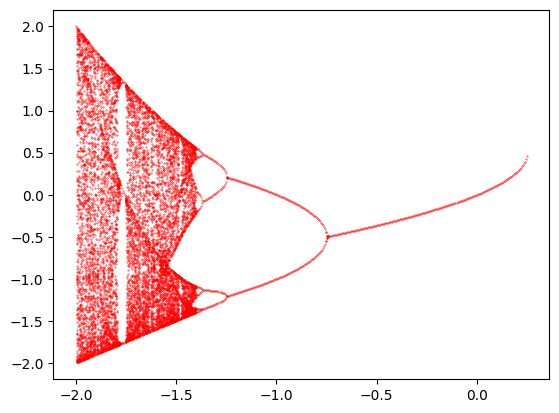

In [6]:
#| label: fig-bifurcation-diagram
#| fig-cap: "Bifurcation diagram of the quadratic map"
#| warning: false

P = np.linspace(-2, 1, 600)
X = []
Y = []

for u in P:
    point = 0 + u
    for i in range(600):
        point = point**2 + u
        if abs(point) > 2:
            break
    else:
    
        points = []
        for i in range(100):
            point = point**2 + u
            new_point = round(point, 3)
            if new_point not in points:
                points.append(new_point)
                
        X.append([u] * len(points))
        Y.append(points)
X= [item for sublist in X for item in sublist]
Y= [item for sublist in Y for item in sublist]
plt.scatter(X, Y, s=0.1, color='red')
plt.show()

The y values represent the long term values of $x_n$ for each corresponding $c$ value on the x axis. For example, at $c=-1$, we see two points at y=-1 and y=0, representing the period-2 cycle we observed earlier. Similarly, at $c=0.2$, we see a single point around y=0.2764, representing the fixed point we calculated.

## Comparison with the Mandelbrot set

Now, if we overlay the bifurcation diagram on top of the Mandelbrot set as shown in @fig-mandelbrot-bifurcation-overlay, we can see that the bulbs of the Mandelbrot set correspond to the stable regions in the bifurcation diagram.

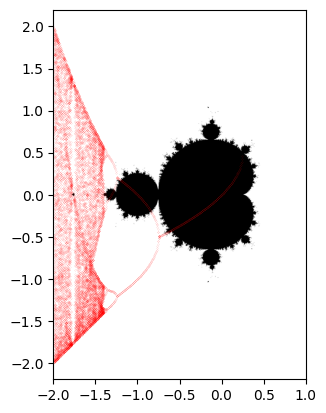

In [7]:
#| label: fig-mandelbrot-bifurcation-overlay
#| fig-cap: "Mandelbrot set with bifurcation diagram overlay"
#| warning: false
plt.imshow(mandelbrot_set, extent=[-2,1,-1.5,1.5], cmap='binary')
plt.scatter(X, Y, s=0.01, alpha=0.5, color='red')
plt.show()

## How do they correspond?

The individual bulbs in the mandelbrot set correspond to regions of stability. They also correspond to parameters of $c$ where a specific period cycle is attracting. For example, the largest bulb at the centre of the set corresponds to fixed points, and the smaller bulbs to the left correspond to period-2, period-4 cycles, and so on. Also, you can see the Feigenbaum point at $c \approx -1.401155$ where the period-doubling bifurcations accumulate, and chaos begins. This is where the orbit becomes chaotic, and there are no stable cycles, except for some periodic windows like around $c \approx -1.75$, where you can see a period-3 cycle emerging. These period windows reveal some smaller minibrots in the Mandelbrot set, and you can see that there are a lot of them as you zoom in closer to the boundary of the Mandelbrot set.

## Visualisation of the period cycles

@fig-mandelbrot-orbit is a visualisation of the orbits of the points in the Mandelbrot set, clicking on different points in the set updates the label underneath to tell you the period of that point, as well as the position of the point in the complex plane. It can also tell you if the point is in chaos, and does not settle into a periodic cycle or a fixed point. You might notice something about the components of the main bulb, and that they all correspond to points that settle into a periodic cycle.

![An image showcasing the periodicities of the mandelbrot set^[Image By No machine-readable author provided. Hoehue~commonswiki assumed (based on copyright claims). - No machine-readable source provided. Own work assumed (based on copyright claims)., CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=396285]](Mandelbrot_Set_–_Periodicities_coloured.png){#fig-mandelbrot-periodicities}

See @fig-mandelbrot-periodicities for a coloured visualisation of the different periodicities in the Mandelbrot set.

# The fibonnaci sequence and the Mandelbrot set

It may not seem likely, but the fibonacci sequence actually has a deep connection to the Mandelbrot set. The Fibonacci sequence is defined as follows:
$$
\begin{aligned}
F(0) = 0 \\
F(1) = 1 \\
F(n) = F(n-1) + F(n-2) \text{ for } n \geq 2
\end{aligned}
$$

The first few numbers in the sequence are:

$$
\begin{aligned}
0, 1, 1, 2, 3, 5, 8, 13, 21 \ldots
\end{aligned}
$$